# Importando librerias

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly import express as px
import plotly.graph_objects as go
plt.style.use('seaborn')

## Funciones

In [2]:
def unicos(column):
    return df[column].unique()

# Carga de la base de datos

In [3]:
df = pd.read_csv('../data/synergy_logistics_database.csv', index_col='register_id')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


Asiganmos el tipo de dato [datetime] a la columna **date**

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000


# Análisis exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   direction       19056 non-null  object        
 1   origin          19056 non-null  object        
 2   destination     19056 non-null  object        
 3   year            19056 non-null  int64         
 4   date            19056 non-null  datetime64[ns]
 5   product         19056 non-null  object        
 6   transport_mode  19056 non-null  object        
 7   company_name    19056 non-null  object        
 8   total_value     19056 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ MB


In [6]:
df.describe()

,year,total_value
count,19056.000000,1.905600e+04
mean,2017.496327,1.131881e+07
std,1.706975,1.536656e+07
min,2015.000000,0.000000e+00
25%,2016.000000,6.400000e+04
50%,2017.000000,5.000000e+06
75%,2019.000000,1.600000e+07
max,2020.000000,2.850000e+08


# Plots

Text(0, 0.5, 'Volumen')

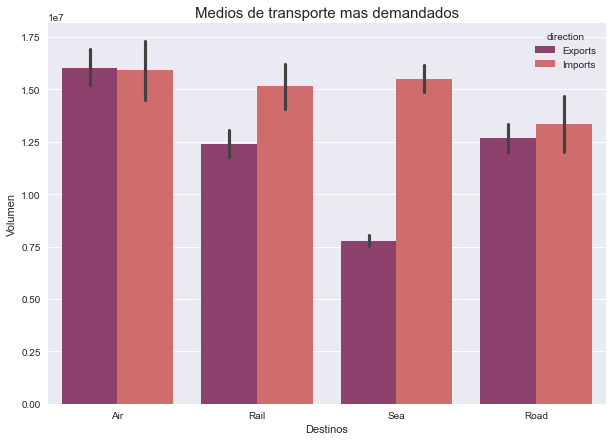

In [7]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df['transport_mode'], 
    y = df['total_value'], 
    hue = df['direction'],
    order= ['Air', 'Rail', 'Sea', 'Road'],
    palette = 'flare_r'
    )
plt.title('Medios de transporte mas demandados',  fontdict = {'fontsize' : 15})
plt.xlabel('Destinos')
plt.ylabel('Volumen')

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df['transport_mode'], 
    y = df['total_value'], 
    hue = df['direction'],
    order= ['Air', 'Rail', 'Sea', 'Road'],
    palette = 'flare_r'
    )
plt.title('Medios de transporte mas demandados',  fontdict = {'fontsize' : 15})
plt.xlabel('Destinos')
plt.ylabel('Volumen')

Text(11.667187500000004, 0.5, 'Cantidad')

<Figure size 720x504 with 0 Axes>

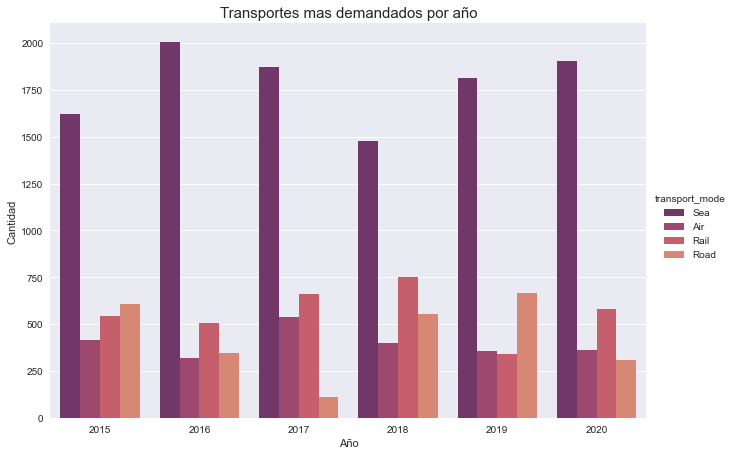

In [15]:
plt.figure(figsize=(10,7))
sns.catplot(
    data=df, 
    x = 'year', 
    hue = 'transport_mode', 
    kind = 'count',
    height=6,
    aspect=1.5,
    palette='flare_r'
    )
plt.title('Transportes mas demandados por año', fontdict={'fontsize':15})
plt.xlabel('Año')
plt.ylabel('Cantidad')

Creamos un array para conocer los destinos mas recurridos en base a contar las veces que aparece en el data frame

In [15]:
destinos_array = []
[destinos_array.append([country, df[df['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(destinos_array)

[['China', 1503], ['USA', 1546], ['South Korea', 415], ['Spain', 632], ['Italy', 422], ['Japan', 1072], ['Germany', 1179], ['Mexico', 1836], ['Brazil', 903], ['France', 893], ['Switzerland', 194], ['United Kingdom', 531], ['Croatia', 30], ['Ireland', 162], ['Belgium', 1248], ['Argentina', 393], ['Singapore', 586], ['Canada', 857], ['Netherlands', 699], ['Belorussia', 219], ['Turkey', 80], ['India', 180], ['Vietnam', 497], ['Russia', 295], ['United Arab Emirates', 615], ['Thailand', 1032], ['Philippines', 114], ['Peru', 44], ['Austria', 66], ['New Zealand', 249], ['Rusia', 204], ['Slovakia', 94], ['Malaysia', 89], ['Poland', 177]]


In [16]:
df_destinos = pd.DataFrame(destinos_array, columns=['Pais', 'Rating'])
display(df_destinos)

,Pais,Rating
0,China,1503
1,USA,1546
2,South Korea,415
3,Spain,632
4,Italy,422
5,Japan,1072
6,Germany,1179
7,Mexico,1836
8,Brazil,903
9,France,893


In [17]:
df_destinos.sort_values(by = 'Rating', ascending=False, inplace=True)
df_destinos.head()

,Pais,Rating
7,Mexico,1836
1,USA,1546
0,China,1503
14,Belgium,1248
6,Germany,1179


Text(0, 0.5, 'Valor')

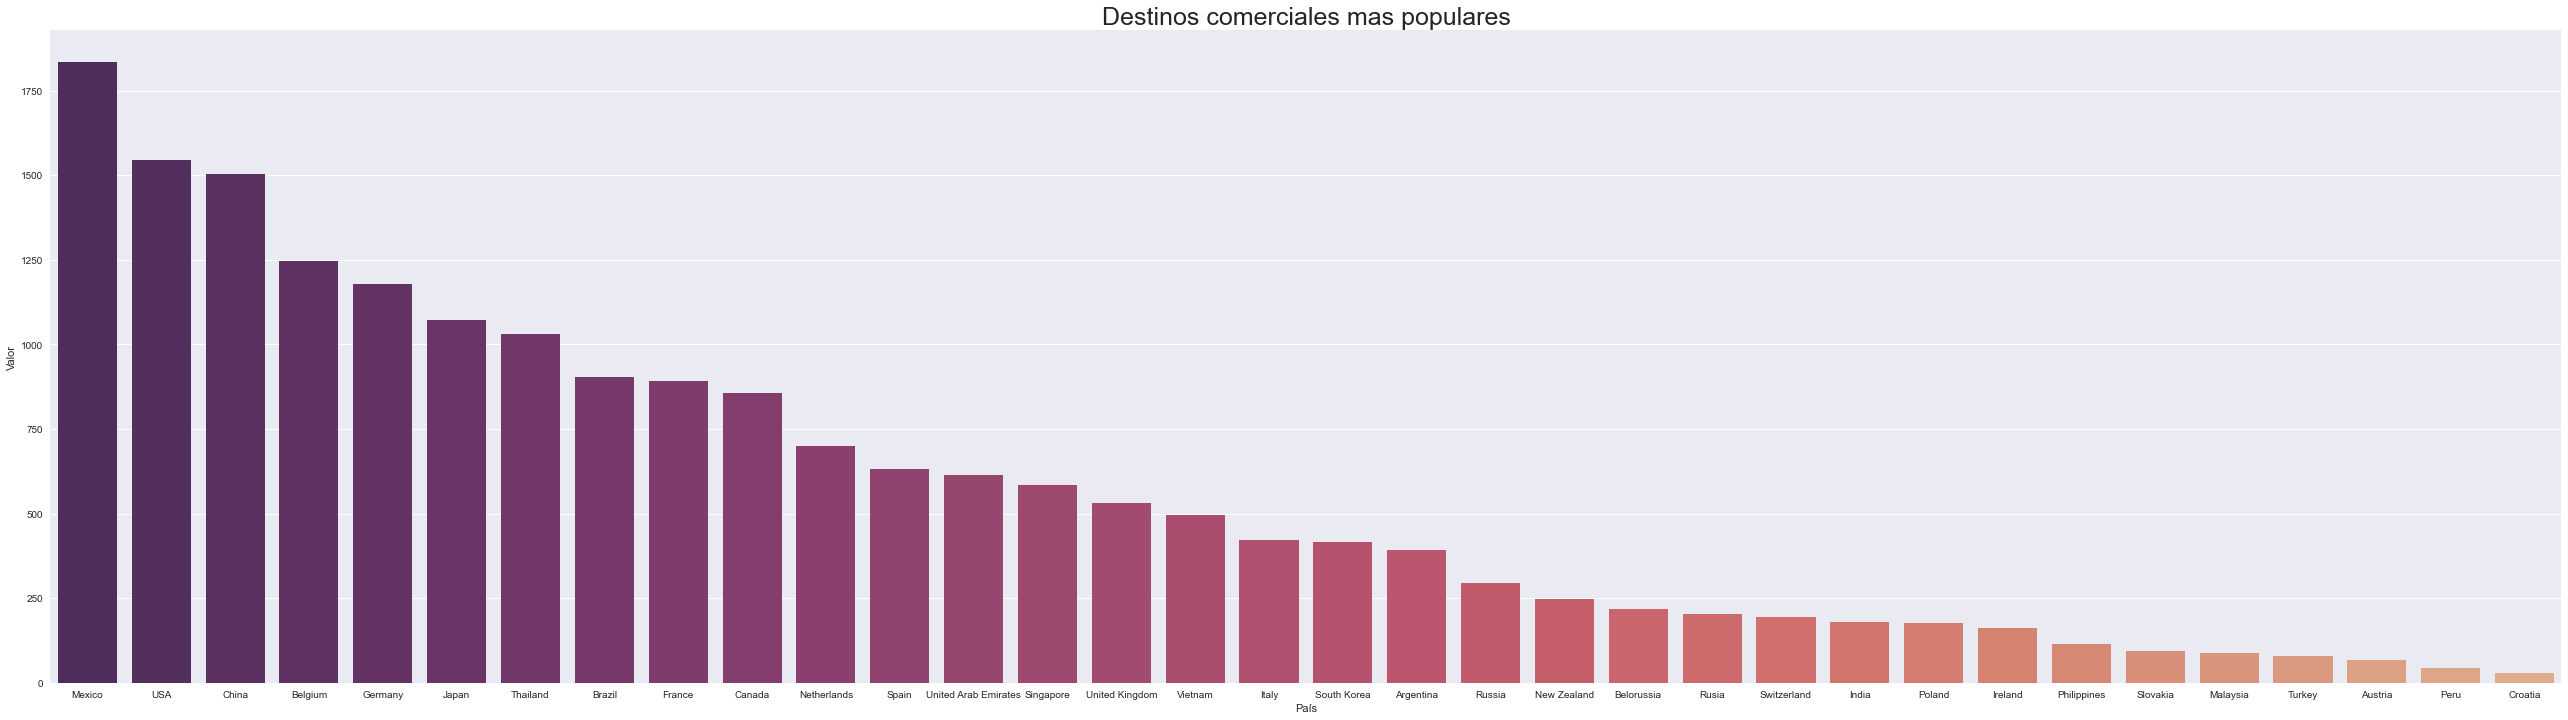

In [21]:
plt.figure(figsize=(45,12))
sns.barplot(
    x = df_destinos['Pais'], 
    y = df_destinos['Rating'],
    palette='flare_r'
    )
plt.title('Destinos comerciales mas populares', fontdict={'fontsize':25})
plt.xlabel('País')
plt.ylabel('Valor')


In [23]:
fig1 = px.bar(df_destinos, x = 'Pais', y = 'Rating', title='Destinos comerciales mas populares')
fig1.show()

In [28]:
fig = px.pie(df_destinos, values='Rating', names='Pais', title='Composición por porsentaje (%) de los destinos comerciales mas populares')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [31]:
df_Exports = df[df['direction'] == 'Exports']
df_Imports = df[df['direction'] == 'Imports']

In [39]:
df_Exports

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
15404,Exports,Netherlands,Belgium,2020,2020-06-27,Meat,Road,Dutch Meat Bv,0
15405,Exports,Netherlands,Belgium,2020,2020-06-28,Meat,Road,Dutch Meat Bv,0
15406,Exports,Netherlands,Belgium,2020,2020-06-29,Meat,Road,Dutch Meat Bv,9000


In [44]:
df_Exports[df_Exports['destination'] == 'China'].destination.count()

1008